# seaborn (Letter Value plot or lvplot)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
print(f"pandas  version = {pd.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas  version = 0.22.0
seaborn version = 0.8.1


## read miles per gallon dataset (mpg.csv)

In [3]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
150,nissan,pathfinder 4wd,3.3,1999,6,auto(l4),4,14,17,r,suv
125,jeep,grand cherokee 4wd,4.7,1999,8,auto(l4),4,14,17,r,suv
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
171,subaru,impreza awd,2.5,2008,4,manual(m5),4,19,25,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact


In [4]:
df['gear']=df.trans.str[0].map({'a':'auto', 'm':'manual'}).astype("category")
df['drv']=df.drv.map({'f':'front', 'r':'rear', '4':'4-wheel'}).astype('category')
df.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,gear
56,dodge,dakota pickup 4wd,5.2,1999,8,auto(l4),4-wheel,11,15,r,pickup,auto
227,volkswagen,passat,1.8,1999,4,manual(m5),front,21,29,p,midsize,manual
146,nissan,altima,3.5,2008,6,auto(av),front,19,26,p,midsize,auto
66,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4-wheel,13,17,r,pickup,auto
21,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),rear,13,17,r,suv,auto


## wide format data

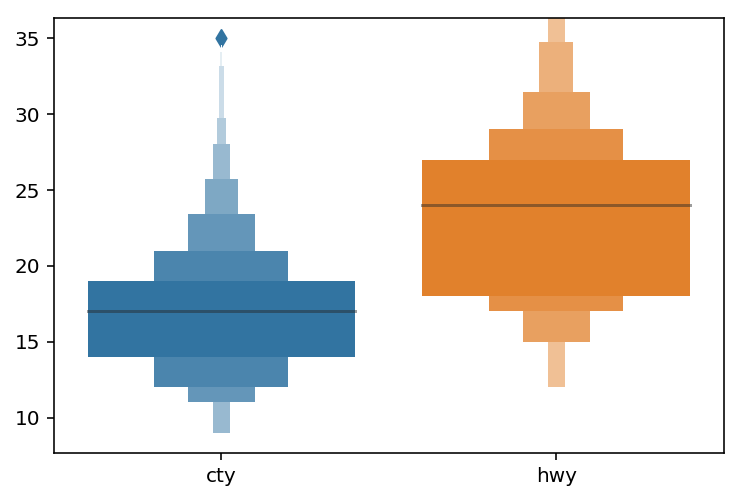

In [5]:
sns.lvplot(data=df[['cty', 'hwy']])

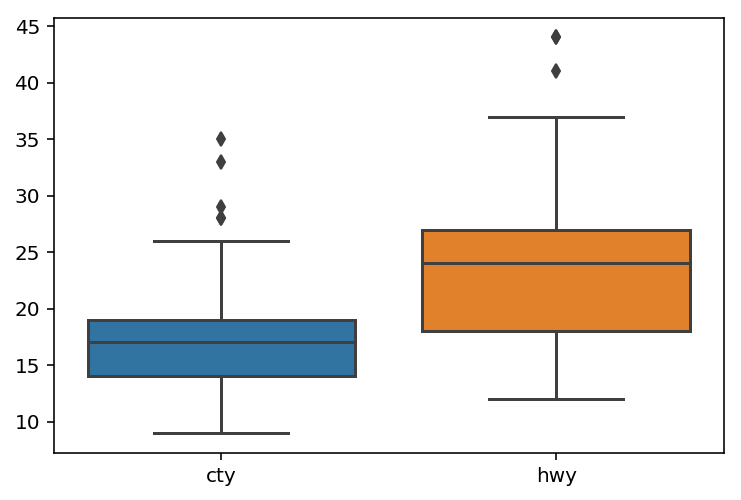

In [6]:
sns.boxplot(data=df[['cty', 'hwy']])

(2,)


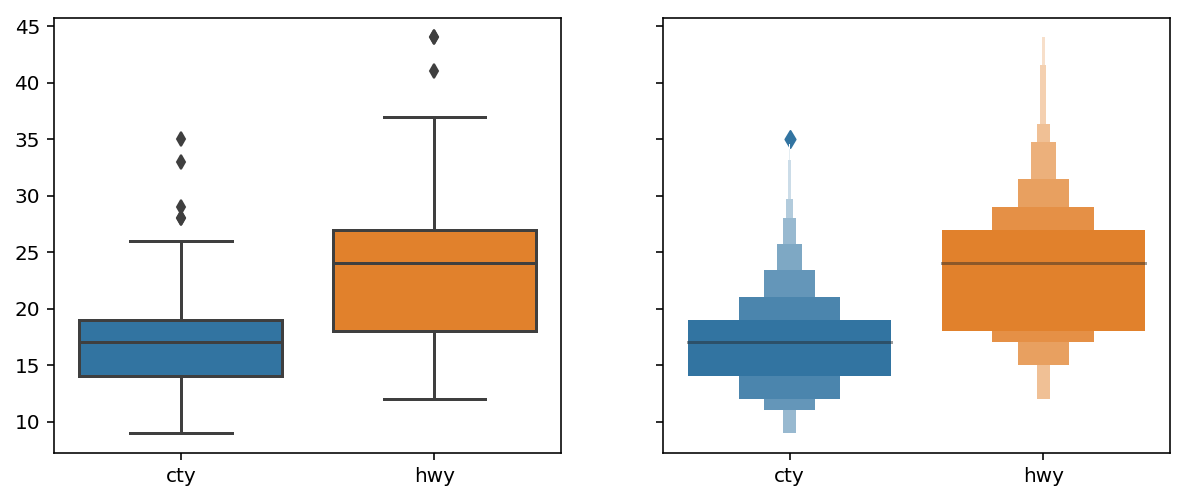

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharey=True, sharex=True)
print(ax.shape)
sns.boxplot(data=df[['cty', 'hwy']], ax=ax[0])
sns.lvplot(data=df[['cty', 'hwy']], ax=ax[1])

## long format data (pass x and y)

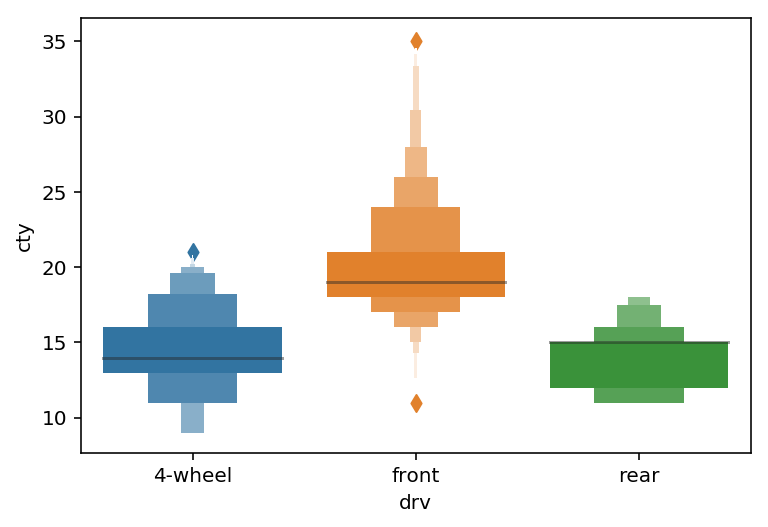

In [8]:
sns.lvplot(x='drv', y='cty', data=df)

## compare to boxplot and violin

(3,)


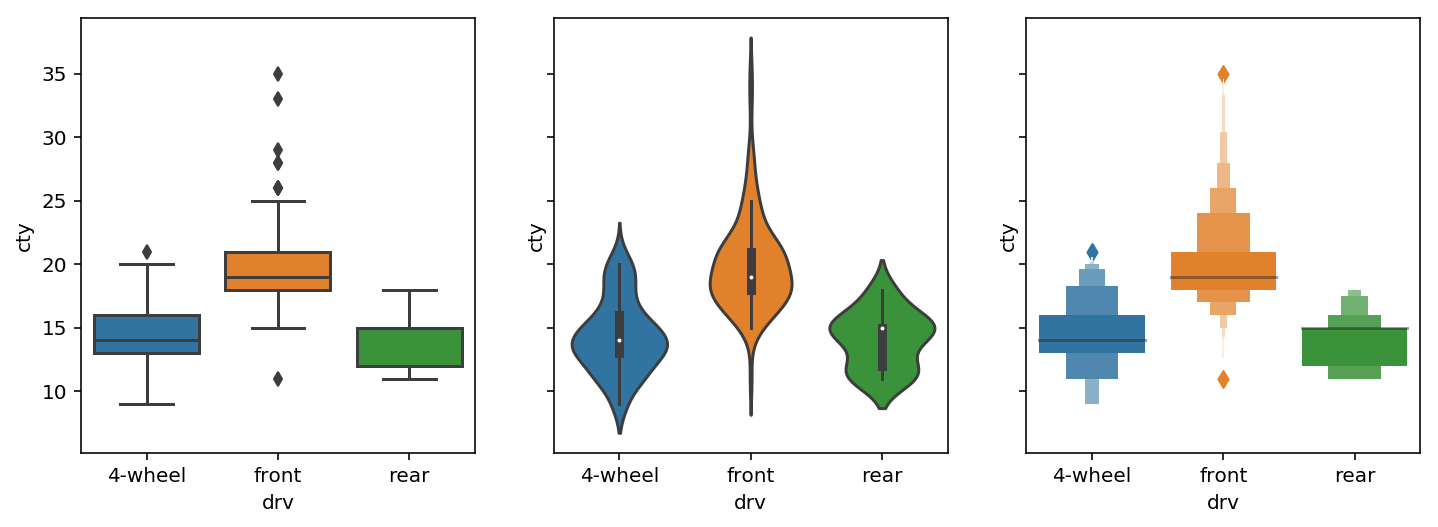

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(12,4), sharey=True, sharex=True)
print(ax.shape)
x_col='drv'
y_col='cty'
sns.boxplot(x=x_col, y=y_col, data=df, ax=ax[0])
sns.violinplot(x=x_col, y=y_col, data=df, ax=ax[1])
sns.lvplot(x=x_col, y=y_col, data=df, ax=ax[2])

(3,)


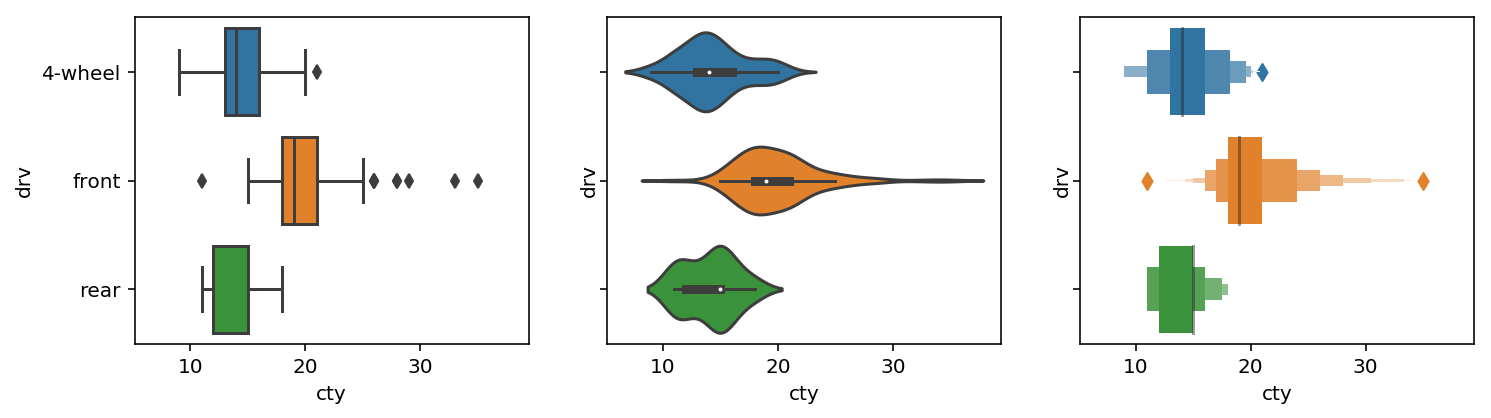

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True, sharex=True)
print(ax.shape)
x_col='cty'
y_col='drv'
sns.boxplot(x=x_col, y=y_col, data=df, ax=ax[0])
sns.violinplot(x=x_col, y=y_col, data=df, ax=ax[1])
sns.lvplot(x=x_col, y=y_col, data=df, ax=ax[2])

### add hue, custom order and label, title

Text(0.5,1,'miles per gallon by driving system')

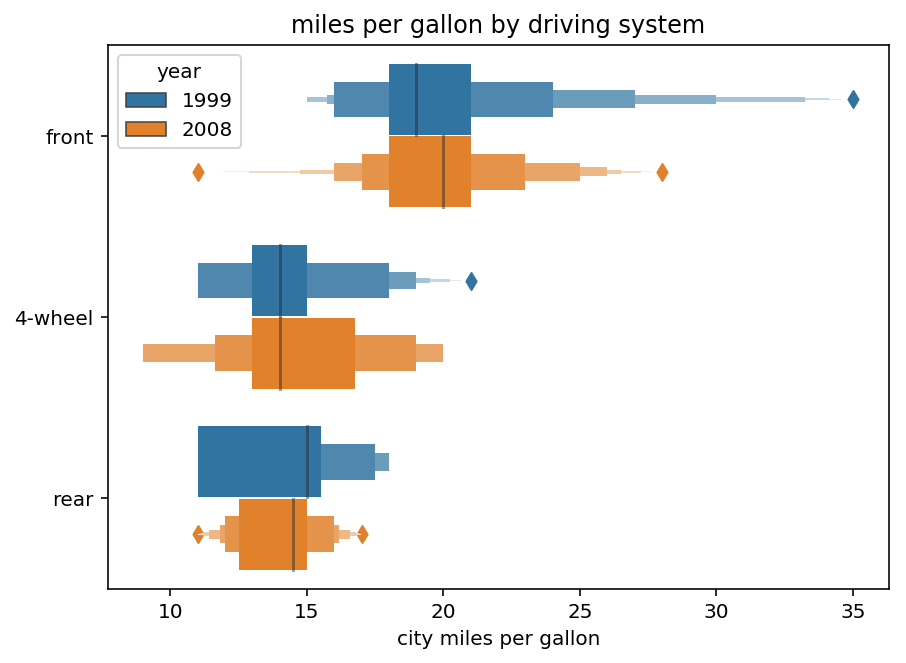

In [11]:
plt.figure(figsize=(7, 5))
sns.lvplot(y='drv', x='cty', data=df,
            hue='year',
            order=['front', '4-wheel', 'rear'])
plt.ylabel('')
plt.xlabel('city miles per gallon')
plt.title('miles per gallon by driving system')

### palette

Text(0.5,1,'miles per gallon by driving system')

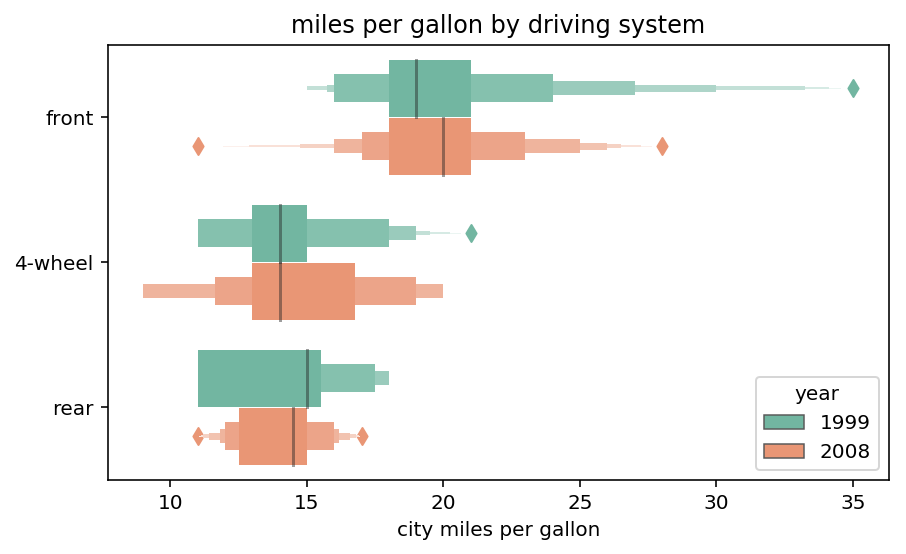

In [12]:
plt.figure(figsize=(7, 4))
sns.lvplot(y='drv', x='cty', data=df,
            hue='year',
            palette="Set2",
            order=['front', '4-wheel', 'rear'])
plt.ylabel('')
plt.xlabel('city miles per gallon')
plt.title('miles per gallon by driving system')

## factorplot

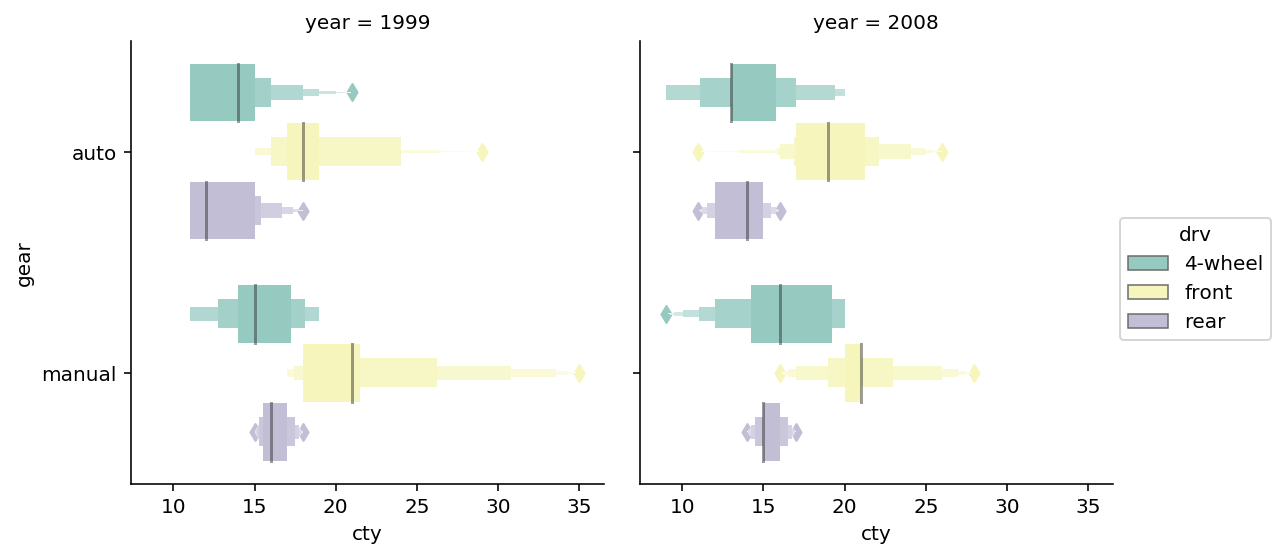

In [13]:
sns.factorplot(y='gear', x='cty', data=df,
               hue='drv',
               kind='lv',
               col='year',
               palette='Set3')

In [14]:
df['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [15]:
dg=df[df['class'].str.match('^(suv|compact|pickup)')]
dg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,gear
124,jeep,grand cherokee 4wd,4.0,1999,6,auto(l4),4-wheel,15,20,r,suv,auto
4,audi,a4,2.8,1999,6,auto(l5),front,16,26,p,compact,auto
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4-wheel,9,12,e,pickup,manual
141,nissan,altima,2.4,1999,4,manual(m5),front,21,29,r,compact,manual
125,jeep,grand cherokee 4wd,4.7,1999,8,auto(l4),4-wheel,14,17,r,suv,auto


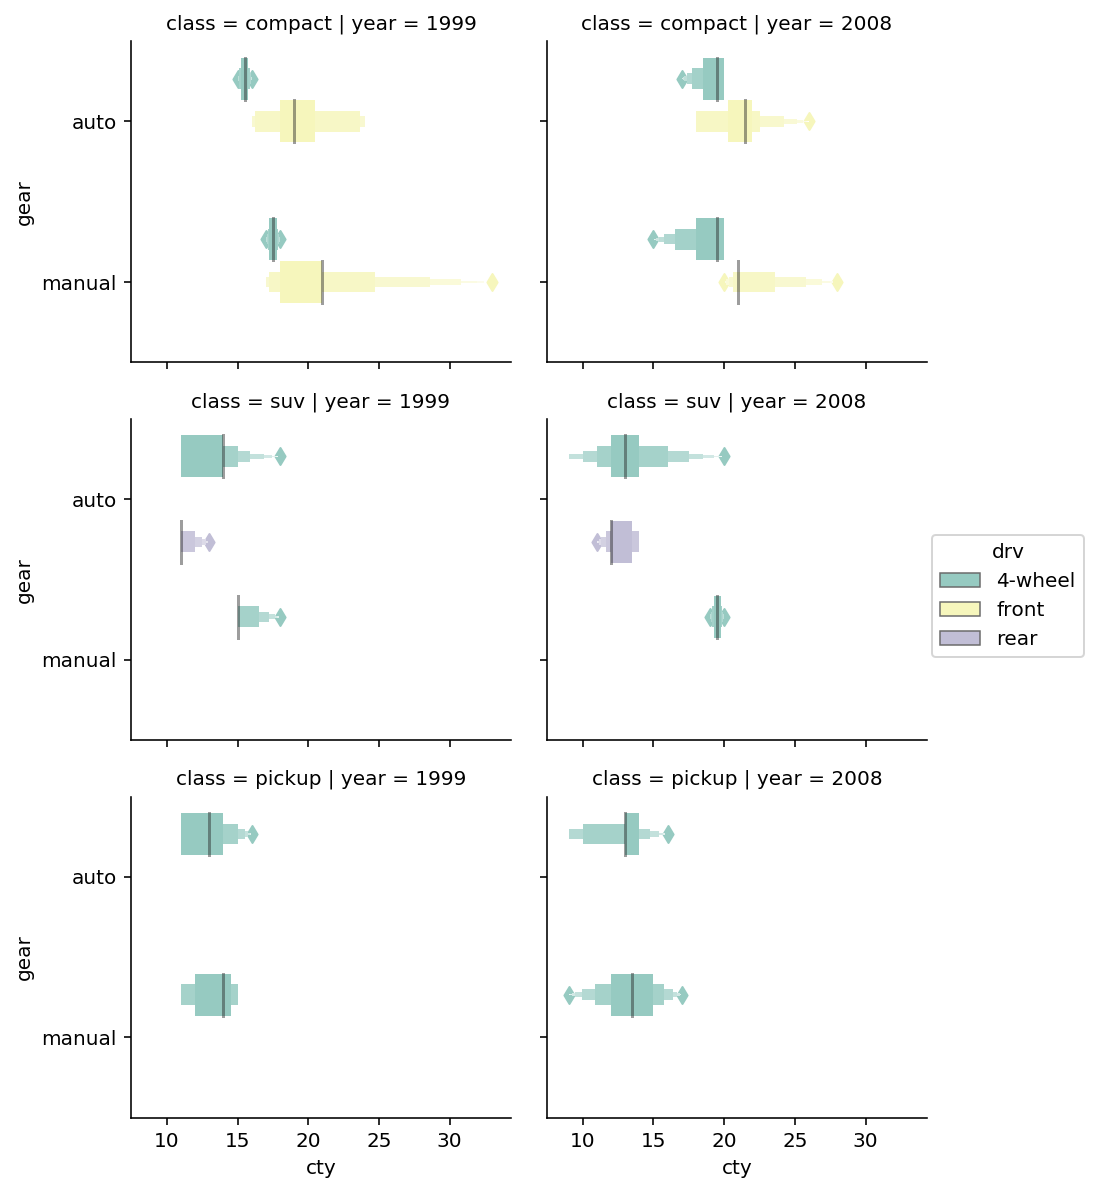

In [16]:
sns.factorplot(y='gear', x='cty', data=dg,
               hue='drv',
               kind='lv',
               col='year',
               row='class',
               palette='Set3',
               size=2.8, aspect=1.2)